# Comparing Income Distribution Estimates

This notebook estimates the income distribution using various distributional assumptions, and compares the resulting estimates.

In [1]:
# imports

from IPython.core.display import display, HTML
from plotly.offline import init_notebook_mode, plot
import plotly.express as px
init_notebook_mode(connected=True)
from iot.generate_data import gen_microdata
from iot.inverse_optimal_tax import IOT
import numpy as np

/var/folders/2m/db9b_l2950xckts1f65_rc2m0000gn/T/ipykernel_99466/1679099148.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# get data
data = gen_microdata()
data = data[data["expanded_income"] > 0]

In [3]:
iot_ln = IOT(data=data, income_measure="expanded_income", dist_type="log_normal") 
iot_Pln = IOT(data=data, income_measure="expanded_income", dist_type="Pln")

df_ln = iot_ln.df()
df_Pln = iot_Pln.df()

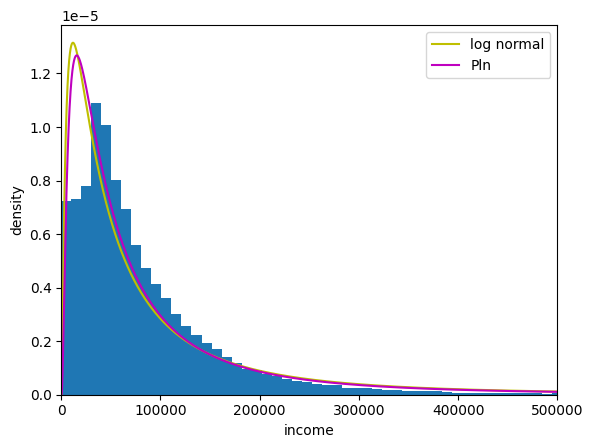

In [4]:
import matplotlib.pyplot as plt
# truncate data.expanded_income to 99.5th percentile 
top99 = data["expanded_income"].quantile(0.99)
data = data[data["expanded_income"] < top99]


# plot weighted histogram of income from data.expanded_income, with weights s006
fig, ax = plt.subplots()
ax.hist(data["expanded_income"], bins=50, density=True, weights=data["s006"])
ax.set_xlabel("income")
ax.set_ylabel("density")
ax.set_xlim(left=0, right=500_000)
ax.plot(df_ln["z"], df_ln["f"], 'y-', label='log normal')
ax.plot(df_Pln["z"], df_Pln["f"], 'm-', label='Pln')

ax.legend()

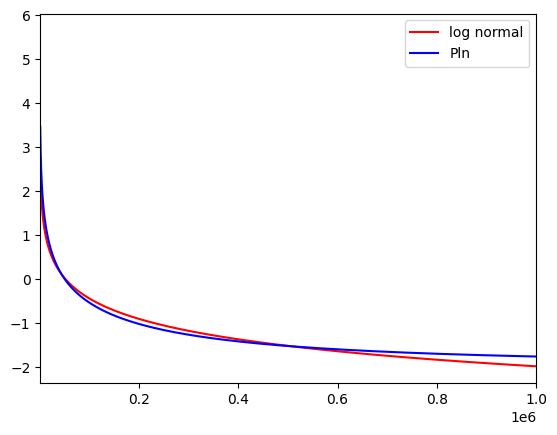

In [5]:
fig, ax = plt.subplots()
ax.plot(df_ln["z"], df_ln["theta_z"], 'r-')
ax.plot(df_Pln["z"], df_Pln["theta_z"], 'b-')
ax.set_xlim(left=1000, right=1_000_000)
ax.legend(["log normal", "Pln"])

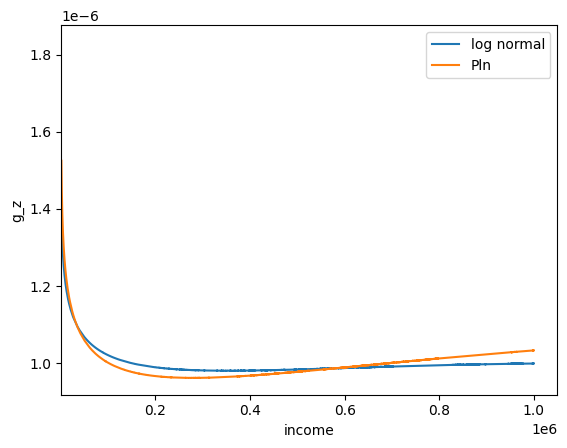

In [6]:
# plot g_z across z
fig, ax = plt.subplots()
ax.plot(df_ln["z"], df_ln["g_z"])
ax.plot(df_Pln["z"], df_Pln["g_z"])

ax.set_xlim(left=1000)
ax.set_xlabel("income")
ax.set_ylabel("g_z")
ax.legend(["log normal", "Pln"])